In [1]:
import gym
import torch
import sys
sys.path.append('..')  # Adds the upper directory to the python path.
from gym_env import ClipRewardWithBound, DoneOnLifeLoss, FireOnReset, MaxAndSkip, NoopReset, ObservationChannelFirst, PlayerIdAndActionMaskWrapper, ResizeAndGrayscaleFrame, ScaledFloatFrame, StackFrameAndAction, StackFrame

In [2]:
def create_classic_environment(
    env_name: str,
    seed: int = 1,
    stack_history: int = 1,
    output_actions: bool = False,
) -> gym.Env | tuple[gym.Env, list[str]]:
    """
    Process gym env for classic games like CartPole, LunarLander, MountainCar

    Args:
        env_name: the environment name with version attached.
        seed: seed the runtime.

    Returns:
        gym.Env for classic games
    """

    env = gym.make(env_name)
    env.reset(seed=seed)

    if stack_history > 1:
        env = StackFrameAndAction(env, stack_history, False)

    env = PlayerIdAndActionMaskWrapper(env)
    if output_actions:
        if env_name == 'CartPole-v1':
            return env, ['MOVE: left', 'MOVE: right']
        if env_name == 'LunarLander-v2':
            return env, ['NOOP', 'FIRE', 'MOVE: right', 'MOVE: left']
        return env
        # return env, env.unwrapped.get_action_meanings()
    return env

In [3]:
env, actions = create_classic_environment('CartPole-v1', output_actions=True)

In [4]:
actions

['MOVE: left', 'MOVE: right']

In [5]:
samples = []

for _ in range(10):
    samples.append(env.step(0))

In [6]:
samples

[(array([ 0.00208309, -0.14954773, -0.03468674,  0.32611182], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.00090786, -0.3441591 , -0.0281645 ,  0.60765743], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.00779105, -0.5388762 , -0.01601136,  0.89133793], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.01856857, -0.7337773 ,  0.0018154 ,  1.1789451 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.03324412, -0.9289228 ,  0.0253943 ,  1.4721965 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.05182257, -1.1243459 ,  0.05483823,  1.7727017 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.07430949, -1.3200417 ,  0.09029227,  2.0819185 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.10071032, -1.5159537 ,  0.13193063,  2.4010992 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.1310294 , -1.7119577 ,  0.17995262,  2.7312255 ], dtype=float32),
  1.0,
  False,
  {}),
 (array([-0.16526856, -1.9078434 ,  0.23457713,  3.0729303 ], dtype=float32),
  1.0,
  True

In [7]:
sys.path.append('../..')

In [8]:
from continous import RepresentationLMClip

In [9]:
# import os

# print(os.getcwd())
# os.chdir('../..')
# os.getcwd()

In [10]:
# os.getcwd()

In [11]:
repr_net = RepresentationLMClip(512, 4, 8, 1)

/Users/paul/dev/muzero/.venv/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [17]:
tensor_inpt = torch.stack([torch.tensor([sample[0]]) for sample in samples])

In [18]:
print(tensor_inpt)
print(tensor_inpt.shape)

tensor([[[ 2.0831e-03, -1.4955e-01, -3.4687e-02,  3.2611e-01]],

        [[-9.0786e-04, -3.4416e-01, -2.8165e-02,  6.0766e-01]],

        [[-7.7910e-03, -5.3888e-01, -1.6011e-02,  8.9134e-01]],

        [[-1.8569e-02, -7.3378e-01,  1.8154e-03,  1.1789e+00]],

        [[-3.3244e-02, -9.2892e-01,  2.5394e-02,  1.4722e+00]],

        [[-5.1823e-02, -1.1243e+00,  5.4838e-02,  1.7727e+00]],

        [[-7.4309e-02, -1.3200e+00,  9.0292e-02,  2.0819e+00]],

        [[-1.0071e-01, -1.5160e+00,  1.3193e-01,  2.4011e+00]],

        [[-1.3103e-01, -1.7120e+00,  1.7995e-01,  2.7312e+00]],

        [[-1.6527e-01, -1.9078e+00,  2.3458e-01,  3.0729e+00]]])
torch.Size([10, 1, 4])


In [19]:
tensor_inpt = tensor_inpt[:8].permute(1, 0, 2)

In [20]:
tensor_inpt.shape

torch.Size([1, 8, 4])

In [22]:
rep = repr_net(tensor_inpt)

tensor([ 0.0021, -0.1495, -0.0347,  0.3261])
tensor([-0.0009, -0.3442, -0.0282,  0.6077])
tensor([-0.0078, -0.5389, -0.0160,  0.8913])
tensor([-0.0186, -0.7338,  0.0018,  1.1789])
tensor([-0.0332, -0.9289,  0.0254,  1.4722])
tensor([-0.0518, -1.1243,  0.0548,  1.7727])
tensor([-0.0743, -1.3200,  0.0903,  2.0819])
tensor([-0.1007, -1.5160,  0.1319,  2.4011])


In [23]:
rep.shape

torch.Size([1, 512])

In [24]:
total_params = sum(p.numel() for p in repr_net.parameters() if p.requires_grad)

In [28]:
for n, p in repr_net.named_parameters():
    if p.requires_grad:
        print(f"layer: {n}; ({p.numel()})")

layer: transformer_layer.layers.0.self_attn.in_proj_weight; (786432)
layer: transformer_layer.layers.0.self_attn.in_proj_bias; (1536)
layer: transformer_layer.layers.0.self_attn.out_proj.weight; (262144)
layer: transformer_layer.layers.0.self_attn.out_proj.bias; (512)
layer: transformer_layer.layers.0.linear1.weight; (1048576)
layer: transformer_layer.layers.0.linear1.bias; (2048)
layer: transformer_layer.layers.0.linear2.weight; (1048576)
layer: transformer_layer.layers.0.linear2.bias; (512)
layer: transformer_layer.layers.0.norm1.weight; (512)
layer: transformer_layer.layers.0.norm1.bias; (512)
layer: transformer_layer.layers.0.norm2.weight; (512)
layer: transformer_layer.layers.0.norm2.bias; (512)
layer: mlp.0.weight; (2048)
layer: mlp.0.bias; (4)
layer: mlp.3.weight; (2048)
layer: mlp.3.bias; (512)


# Notes 1

In case of classical control the output vector somehow has to encode output intensity.

E.g.:
You push joystick left at (0.1) joystick up at (0.001) joystick right would ideally be aligned in embedding space such that in case the vector aligns positively with joystick left it can only negatively align with joystick right but this is not guaranteed. In practice they will most likely be extremely close together.

Idea 1:

log scaling on vector magnitude for intensity

Idea 2:

Poincare metric to disalign set of very close embedding vectors in local space.

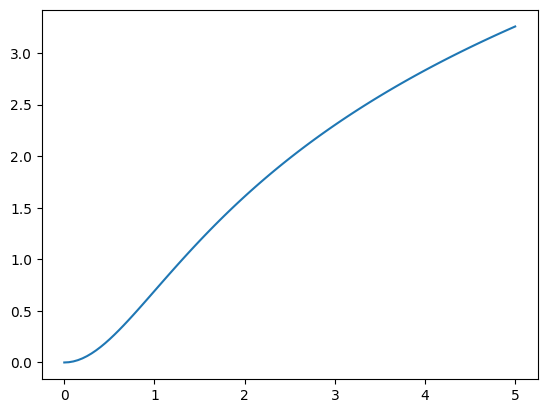

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
y = np.log(x**2 + 1)

plt.plot(x, y)
plt.show()

# Notes 2

### How to do single-tick multi-action correctly? (Multitasking)

Problem:

Consider a robot hand with 5 fingers.
Each of the fingers with 3 segments might have to apply an acceleration a0 ... a14 to each of the actuators, in this tick to perform an action goal in n ticks.

There must exist a point in embedding space between all actions "apply acceleration to s{k}" for k in {0..14}.
